In [1]:
%pylab notebook
import cv2
import numpy as np
import utils
from numpy import matrix as mat
np.set_printoptions(formatter={'all':lambda x: '{:8.3f}'.format(x)})

Populating the interactive namespace from numpy and matplotlib


In [3]:
def generate_3d_points():
    ax=np.linspace(-2,2,8)
    xx,yy=np.meshgrid(ax,ax)
    return np.vstack((xx.flatten(),yy.flatten(),np.zeros(len(ax)**2))).T
pts3d=generate_3d_points()
pts3d[:10,:]

array([[  -2.000,   -2.000,    0.000],
       [  -1.429,   -2.000,    0.000],
       [  -0.857,   -2.000,    0.000],
       [  -0.286,   -2.000,    0.000],
       [   0.286,   -2.000,    0.000],
       [   0.857,   -2.000,    0.000],
       [   1.429,   -2.000,    0.000],
       [   2.000,   -2.000,    0.000],
       [  -2.000,   -1.429,    0.000],
       [  -1.429,   -1.429,    0.000]])

<IPython.core.display.Javascript object>


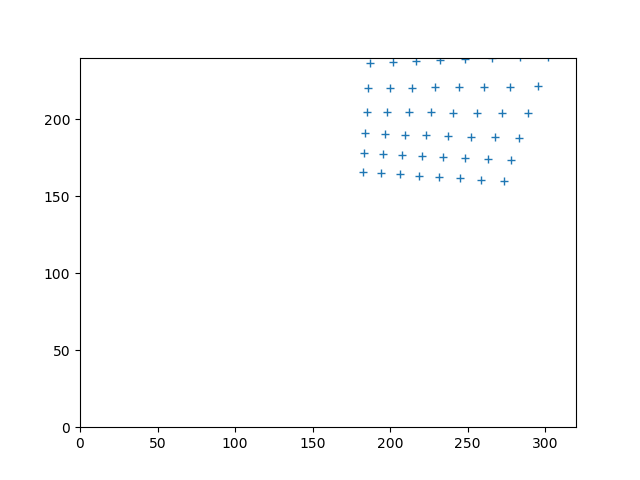

(0, 240)

In [82]:
K=mat([160.0,0,160, 0,160.0,120.0,0,0,1]).reshape(3,3)
x,y,z=1,0,8.0
rx,ry,rz=30/180.0*np.pi,-15/180.0*np.pi,0
R=utils.eulerAnglesToRotationMatrix([rx,ry,rz]) 
C=np.array([x,y,z])
#0=RC+T T=-R.T*C
T=-mat(R).T*mat(C).T
if 1:
    pts=(K*((mat(R).T*pts3d.T).T+T.T).T).T
    pts/=pts[:,2]
    pts=pts[:,:2]
else:
    R_vec,_=cv2.Rodrigues(R.T)
    pts,jac=cv2.projectPoints(pts3d,R_vec,T,K,np.zeros(5))
    pts=pts.reshape(-1,2)
plot(pts[:,0],pts[:,1],'+')
xlim([0,320])
ylim([0,240])
#(mat(R)*generate_3d_points().T).T

In [111]:
#esimaed camera position 0,0,7 (estimate camera positive altitude) esitmate rotation is 0,0,0
#0=RC+T T=-R.T*C => T=-C
estimate_CamPos=np.array([[   0.0],[   0.0],[   7.0]])
estimate_Rvec=np.array([[   0.0],[   0.0],[   0.0]])
estimate_Tvec=-estimate_CamPos
resPnP,Rvec,Tvec=cv2.solvePnP(pts3d,pts,K,np.zeros(5),estimate_Rvec,estimate_Tvec,True)
Rest,_=cv2.Rodrigues(Rvec)
angs=utils.rotationMatrixToEulerAngles(Rest.T)/np.pi*180
print('calculated camera angles')
print(angs)
print('calculated camera position')
###retriving camera position from translation vector
#0=RC+T C=-R.T*T
print(-mat(Rest).T*Tvec)


calculated camera angles
[  30.000  -15.000   -0.000]
calculated camera position
[[   1.000]
 [   0.000]
 [   8.000]]


In [91]:
print(Tvec)

[[   3.036]
 [   3.734]
 [   6.468]]
